In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

**Ajuste para rendija sencilla**

Acá vamos a usar el siguiente ajuste

$$ I=A \left(\frac{\sin(B x'+C)}{Bx'+C}\right)^2$$
Donde $A=I_0$, $B=\frac{\pi a}{\lambda L}$, $x'=x-x_0$ y $C$ es un desfase. Además, vamos a pasar $x$ a metros para mejor visibilidad. Este ajuste es válido en ángulos pequeños donde $\sin \theta \approx \tan \theta \approx \frac{x}{L}$.

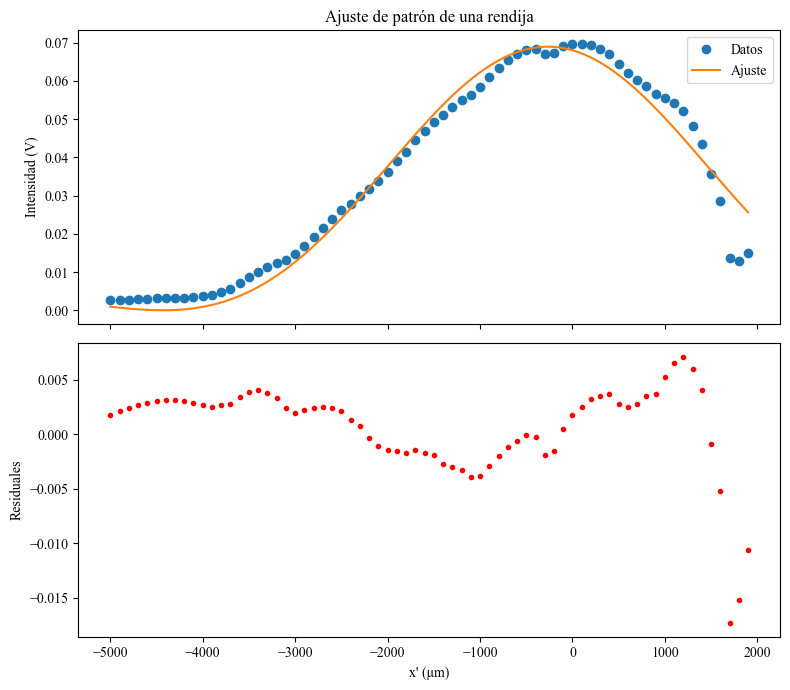

A = 0.06891 ± 0.00101
B = 754.73898 ± 14.28927  m⁻¹
C = 0.20334 ± 0.02257  rad
x₀ (centro del patrón) = 5000.00 μm
B teórico=1339.6983597397839 m⁻¹


(np.float64(1.1892825598347765e-06), np.float64(2.2516370996759345e-08))

In [249]:
a = 1e-4    
λ = 670e-9  
L = 0.35          
B0_teorico = np.pi * a / (λ * L)


data = pd.read_excel("Doble Rendija.xlsx", sheet_name="Hoja3")
x_array = data['micras'].to_numpy()
x = x_array * 1e-6 
I = data['voltaje'].to_numpy() - 0.007


x0_indice = np.argmax(I)
x0 = x[x0_indice]
x_prima = x - x0


def modelo_rendija(x, A, B, C):
    arg = B * x + C
    return A * (np.sin(arg) / arg)**2


A0 = np.max(I)
params_iniciales = [A0, B0_teorico, 0.1]


params, cov = curve_fit(modelo_rendija, x_prima, I, p0=params_iniciales)
A_fit, B_fit, C_fit = params
errors = np.sqrt(np.diag(cov))

x_fit = np.linspace(x_prima.min(), x_prima.max(), 1000)
I_fit = modelo_rendija(x_fit, A_fit, B_fit, C_fit)
I_model = modelo_rendija(x_prima, A_fit, B_fit, C_fit)
residuals = I - I_model


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

ax1.plot(x_prima * 1e6, I, 'o', label='Datos')
ax1.plot(x_fit * 1e6, I_fit, '-', label='Ajuste')
ax1.set_ylabel("Intensidad (V)")
ax1.legend()
ax1.set_title("Ajuste de patrón de una rendija")

ax2.plot(x_prima * 1e6, residuals, 'r.')
ax2.set_xlabel("x' (μm)")
ax2.set_ylabel("Residuales")

plt.tight_layout()
plt.show()

print(f"A = {A_fit:.5f} ± {errors[0]:.5f}")
print(f"B = {B_fit:.5f} ± {errors[1]:.5f}  m⁻¹")
print(f"C = {C_fit:.5f} ± {errors[2]:.5f}  rad")
print(f"x₀ (centro del patrón) = {x0*1e6:.2f} μm")
print(f"B teórico={B0_teorico} m⁻¹")

exp_lambda=(np.pi * a)/(B_fit*L)
inc_lambda=(np.pi * a*errors[1])/((B_fit)**2*L)

exp_lambda,inc_lambda


Con este código, que realmente no supe mejorar, $B=667.65416 \pm 16.28528 \text{m}^{-1}$. Ya sabemos que $B=\frac{\pi a}{\lambda L}$. Por lo tanto, $\lambda=\frac{\pi a}{BL}$ y $\sigma_\lambda=\frac{\pi a}{B^2 L}\sigma_B$. Teniendo eso en cuenta, $\lambda=(1340 \pm 30) \text{nm}$

# Doble rendija

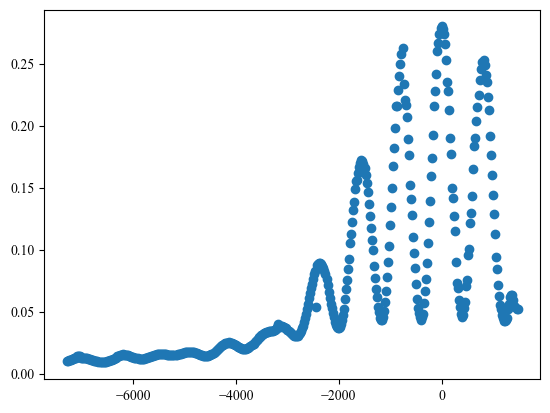

In [250]:
data = pd.read_excel("Doble Rendija.xlsx", sheet_name="Hoja2")
x_= data['micras '].to_numpy()
I = data['voltaje'].to_numpy()

x0_indice = np.argmax(I)
x0 = x_[x0_indice]
x = x_ - x0

plt.scatter(x,I)

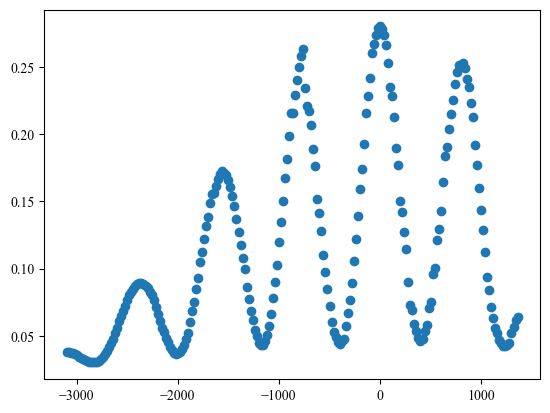

In [251]:
#filtrado
i_malo = 243
I[i_malo] = 0.5*(I[i_malo+1] + I[i_malo-1])

I0 = I[x0_indice]
x = x[210:434]
I = I[210:434]

plt.scatter(x,I)

In [252]:
d = 356
a = 100
λ = 0.67
C0 = np.pi * a / λ
D0 = np.pi * d / λ

modelo = lambda x,C,D: I0 * (np.cos(D*x) * np.sin(C*x)/(C*x))**2
param_0 = [C0,D0]
param, cov = curve_fit(modelo, x, I, p0=param_0)
C,D = param
errors = np.sqrt(np.diag(cov))
C_incer = errors[0]
D_incer = errors[1]

x_ = x / (10**5.64)
model = modelo(x_,C,D)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17492\1159093196.py:7: RuntimeWarning: invalid value encountered in divide
  modelo = lambda x,C,D: I0 * (np.cos(D*x) * np.sin(C*x)/(C*x))**2
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17492\1159093196.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  param, cov = curve_fit(modelo, x, I, p0=param_0)


Text(0, 0.5, 'Residual')

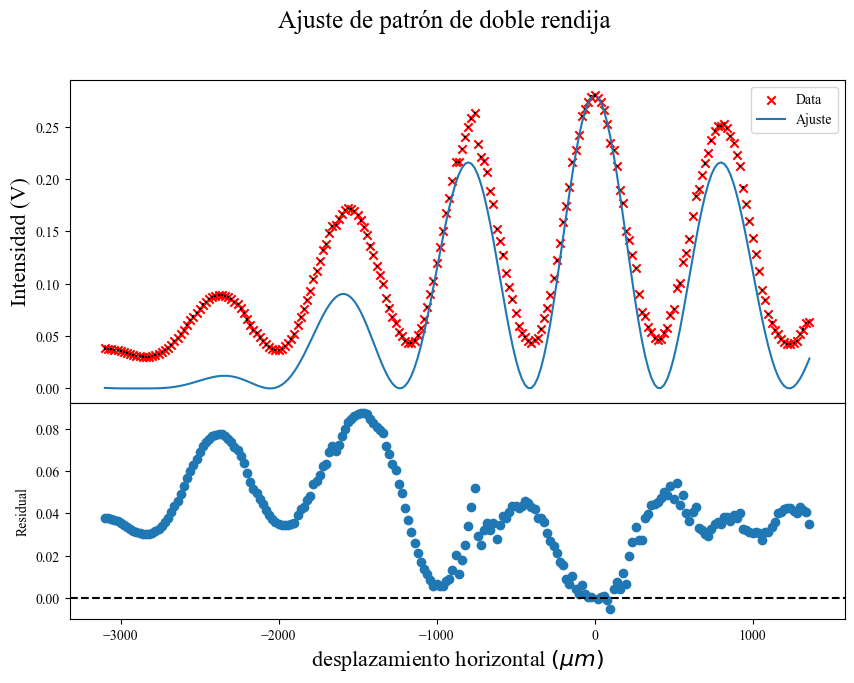

In [253]:
y = I
incer_y = 0.001

plt.rc('font', family='Times New Roman') 

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Ajuste de patrón de doble rendija", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x,model,label='Ajuste')
axs[0].set_ylabel('Intensidad (V)', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,(y-model))#/incer_y)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('desplazamiento horizontal ' + r"$(\mu m)$",fontsize=16)
axs[1].set_ylabel('Residual')
#axs[1].set_ylim(-6.,7.5)
#axs[1].set_yticks(np.arange(-4.5, 7., 1.5))

In [ ]:
C0,C,C_incer #teorico, experimental, incertidumbre

(468.89442590892435, np.float64(468.89442590892435), np.float64(inf))

In [ ]:
D0,D,D_incer #teorico, experimental, incertidumbre

(1669.2641562357708, np.float64(1669.2641562357708), np.float64(inf))

In [260]:
λ_exp = (np.pi * a) / C
λ_exp

np.float64(0.67)